In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car=pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
name          892 non-null object
company       892 non-null object
year          892 non-null object
Price         892 non-null object
kms_driven    840 non-null object
fuel_type     837 non-null object
dtypes: object(6)
memory usage: 41.9+ KB


##### Creating backup copy

In [6]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

#### year has many non-year values

In [7]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [8]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [9]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [10]:
car['Price']=car['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [11]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [12]:
car=car[car['kms_driven'].str.isnumeric()]

In [13]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [14]:
car=car[~car['fuel_type'].isna()]

In [15]:
car.shape

(816, 6)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [16]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [17]:
car=car.reset_index(drop=True)

## Cleaned Data

In [18]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [35]:
car.to_csv('Cleaned_Car_data.csv')

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
name          816 non-null object
company       816 non-null object
year          816 non-null int32
Price         816 non-null int32
kms_driven    816 non-null int32
fuel_type     816 non-null object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [20]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [21]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price

In [22]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [23]:
import seaborn as sns

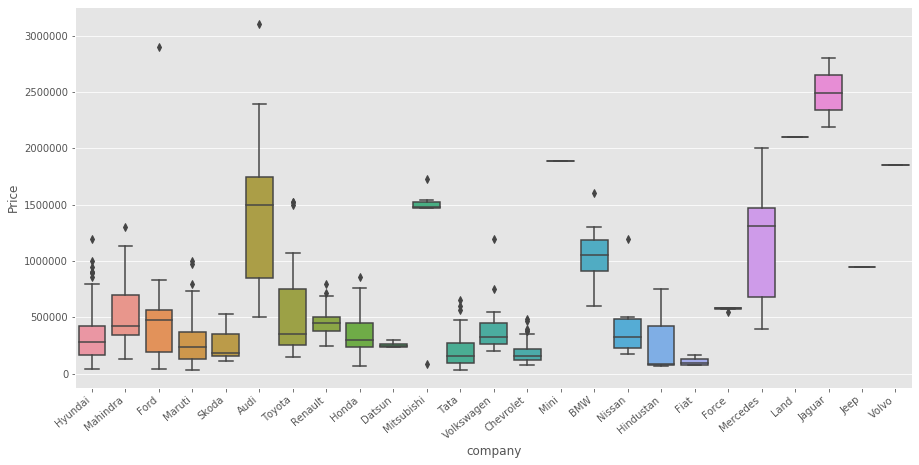

In [24]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

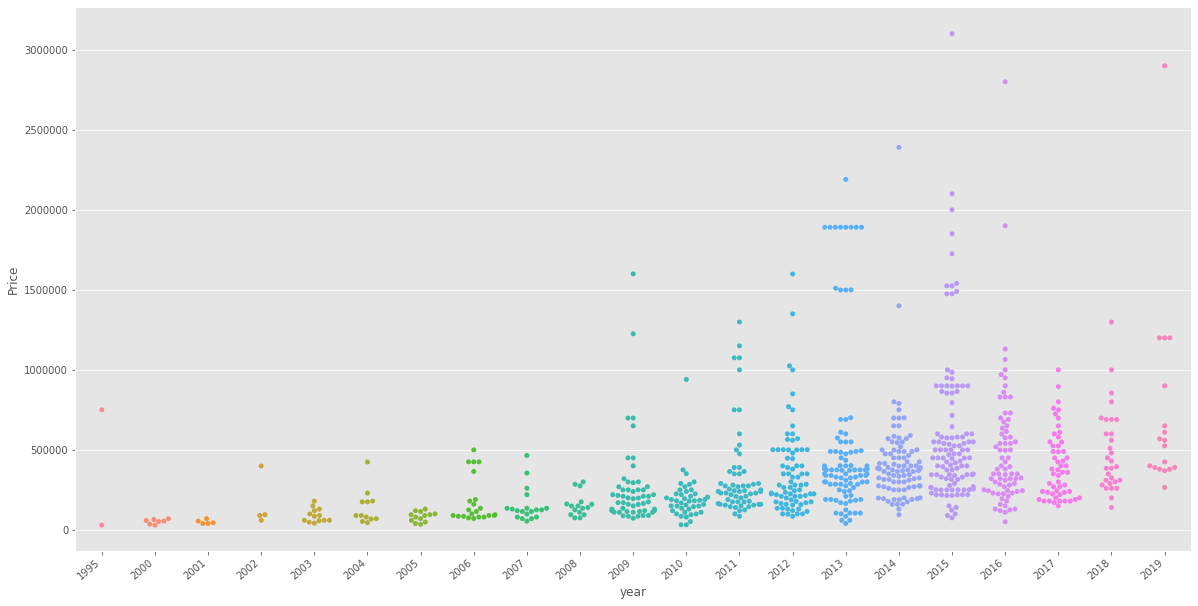

In [25]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

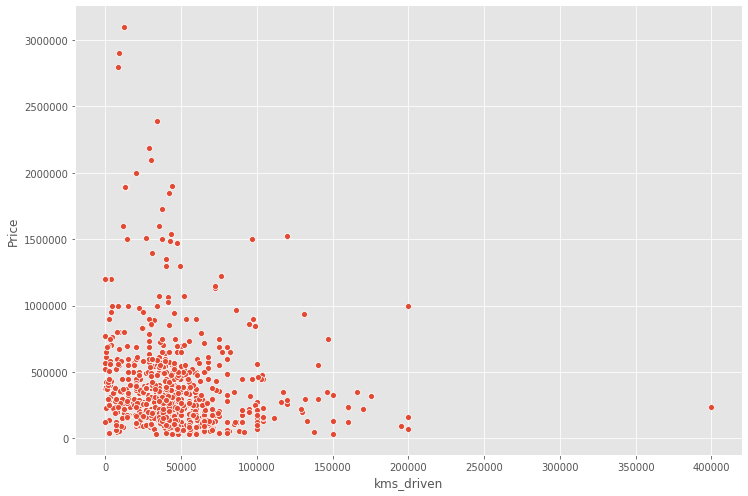

In [26]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

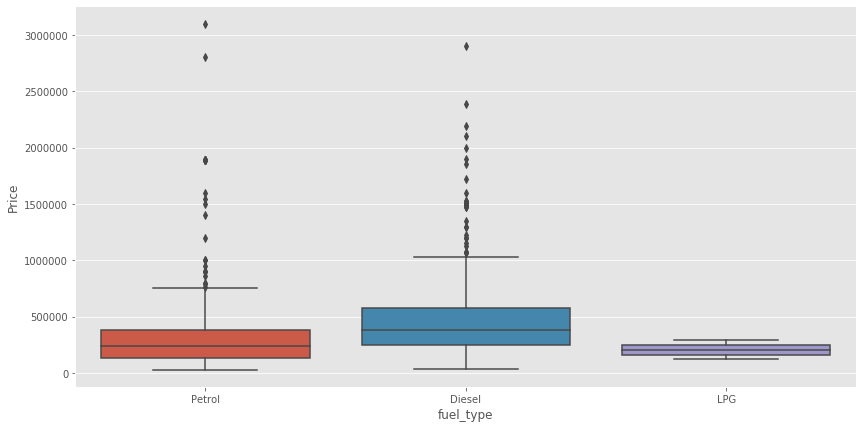

In [27]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

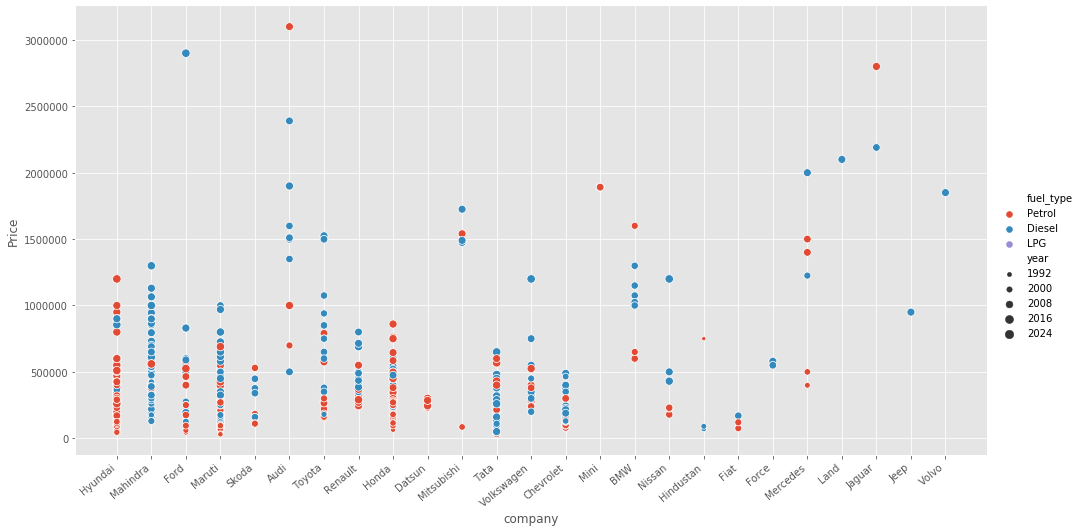

In [28]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [19]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [20]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [21]:
y.shape

(816,)

### Applying Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

#### Creating an OneHotEncoder object to contain all the possible categories

In [25]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

#### Creating a column transformer to transform categorical columns

In [26]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    (PolynomialFeatures(degree=20),['kms_driven']),remainder='passthrough')

In [156]:
column_trans

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrole...
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                               drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['name', 'c

#### Linear Regression Model

In [27]:
lr=LinearRegression()

#### Making a pipeline

In [28]:
pipe=make_pipeline(column_trans,lr)

In [159]:
pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'B...
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['name', 'company',
       

#### Making scoring function compatible with cross_val_score

In [160]:
scoring_func=make_scorer(r2_score,greater_is_better=False)

#### Applying cross validation

In [161]:
-cross_val_score(pipe,X,y,scoring=scoring_func,cv=10)

array([-1.46261912e-02, -5.71485698e-02, -2.99405725e-02, -1.78290990e-02,
       -1.24694895e+09, -1.66291233e-02, -5.91132510e-04, -3.94275065e-02,
       -1.08878039e-02, -8.97980876e-02])

#### Fitting the  model

In [146]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'B...
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                          

In [147]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [148]:
r2_score(y_test,y_pred)

0.9210018360009655

#### Fitting the model with a random state of TrainTestSplit where the model was found to give almost 1.0 as r2_score

In [149]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [150]:
np.argmax(scores)

144

In [151]:
scores[np.argmax(scores)]

0.9210018360009655

In [152]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([419653.19275247])

In [153]:
car[(car['name']=='Maruti Suzuki Swift') & (car['company']=='Maruti')].sort_values('year')

,name,company,year,Price,kms_driven,fuel_type
571,Maruti Suzuki Swift,Maruti,2006,189700,48247,Petrol
196,Maruti Suzuki Swift,Maruti,2006,135000,45000,Petrol
123,Maruti Suzuki Swift,Maruti,2007,125000,70000,Petrol
469,Maruti Suzuki Swift,Maruti,2007,130000,62000,Petrol
775,Maruti Suzuki Swift,Maruti,2008,175000,58000,Diesel
761,Maruti Suzuki Swift,Maruti,2008,162000,60000,Diesel
809,Maruti Suzuki Swift,Maruti,2009,250000,51000,Diesel
742,Maruti Suzuki Swift,Maruti,2009,120000,90000,Diesel
741,Maruti Suzuki Swift,Maruti,2009,120000,90000,Diesel
518,Maruti Suzuki Swift,Maruti,2009,150000,45000,Petrol


#### The best model is found at a certain random state 

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9210018360009655

In [51]:
import pickle

In [52]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [53]:
del pipe

In [55]:
pipe=pickle.load(open('LinearRegressionModel.pkl','rb'))

In [57]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([416109.14071676])

In [34]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese